# 머신러닝 알고리즘

### 지도 학습 / 비지도 학습

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
kn = KNeighborsClassifier()

In [5]:
# 전체 데이터 49개중에서 앞 35개(훈련), 뒤 14개 추출(테스트)
train_data = fish_data[:35]
train_target = fish_target[:35]
test_data = fish_data[35:]
test_target = fish_target[35:]

In [6]:
kn = kn.fit(train_data, train_target)
kn.score(test_data, test_target)

C:\Users\yang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.0

In [7]:
# 위에 정확도가 0이 나온 이유는
# 훈련용 데이터는 도미만 가지고했고
# 테스트용 데이터는 빙어만 해서그렇다.
# 도미데이터에서 빙어데이터를 찾고있던것이다.
# 이 문제를 해결하려면 train, test 데이터를 섞는것이다.

In [8]:
import numpy as np

In [9]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [10]:
input_arr.shape

(49, 2)

In [11]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

In [12]:
# train / test 데이터 분리
train_data = input_arr[index[:35]]
train_target = target_arr[index[:35]]
test_data = input_arr[index[35:]]
test_target = target_arr[index[35:]]

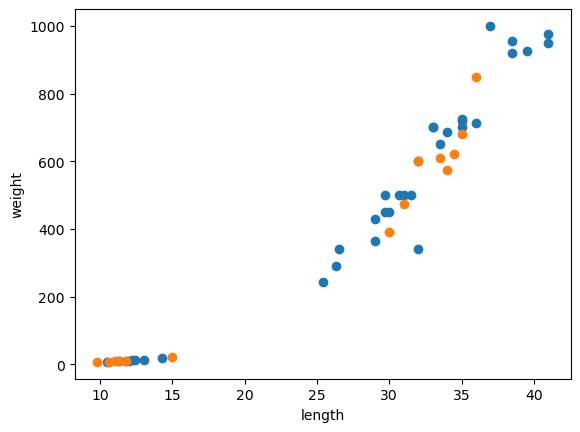

In [17]:
# 시각화
import matplotlib.pyplot as plt

# 2차원 배열은 행과 열 인덱스를 콤마로 나누어 지정함
plt.scatter(train_data[:,0], train_data[:,1])
plt.scatter(test_data[:,0], test_data[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 학습

In [18]:
kn = kn.fit(train_data, train_target)
kn.score(test_data, test_target)

C:\Users\yang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

In [19]:
kn.predict(test_data)

C:\Users\yang\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])